In [1]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import yaml

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls #/content/drive/MyDrive/MS EE AI AS/ANN/ANN Project/Finalized/bestown.pt

best.pt  Croped_Yolo.ipynb


In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 58.7MB/s]


In [14]:
model = YOLO("/content/drive/MyDrive/MS EE AI AS/ANN/ANN Project/Finalized/bestopen.pt")

In [15]:
predict = model.predict("/content/r10s5.jpg", save = True, save_txt = True) 


image 1/1 /content/r10s5.jpg: 800x800 1 2, 684.4ms
Speed: 3.8ms preprocess, 684.4ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


In [17]:
list = open("/content/runs/detect/predict4/labels/r10s5.txt","r").readlines()

In [18]:
list

['2 0.145604 0.617209 0.238682 0.587995\n']

In [19]:
li = list[0].split()

In [20]:
xc, yc, nw, nh = float(li[1]), float(li[2]), float(li[3]), float(li[4]),

In [21]:
xc,yc,nw,nh

(0.145604, 0.617209, 0.238682, 0.587995)

In [22]:
img = cv2.imread("/content/runs/detect/predict4/r10s5.jpg")
h, w = img.shape[0], img.shape[1]

In [23]:
h,w

(512, 512)

In [24]:
xc = w*xc
yc = h*yc
nw = w*nw
nh = h*nh
top_left = (int(xc - nw/2),int(yc - nh/2))
bottom_right = (int(xc + nw/2),int(yc + nh/2))

In [25]:
xc,yc,nw,nh

(74.549248, 316.011008, 122.205184, 301.05344)

In [26]:
top_left , bottom_right

((13, 165), (135, 466))

In [ ]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/MS EE AI AS/ANN/ANN Project/Finalized/runs/detect/predict/rgb_7.jpg')

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
x1, y1 = top_left
x2, y2 = bottom_right

In [ ]:
x1,y1,x2,y2

(223, 0, 512, 473)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dKcqr3dBQsM876ExUncK")
project = rf.workspace("ann-prpoject").project("door-detection2")
dataset = project.version(1).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.105, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to door-detection2-1 in yolov8:: 100%|██████████| 596/596 [00:00<00:00, 974.57it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=100 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/door-detection2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=100, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

In [ ]:
cd /content/runs/detect/train4/

/content/runs/detect/train4


In [ ]:
ls

args.yaml                                           R_curve.png
confusion_matrix_normalized.png                     results.csv
confusion_matrix.png                                results.png
events.out.tfevents.1684689393.66c67aebb46d.3061.0  train_batch0.jpg
F1_curve.png                                        train_batch1.jpg
labels_correlogram.jpg                              train_batch2.jpg
labels.jpg                                          val_batch0_labels.jpg
P_curve.png                                         val_batch0_pred.jpg
PR_curve.png                                        weights/


In [ ]:
from IPython.display import display, Image

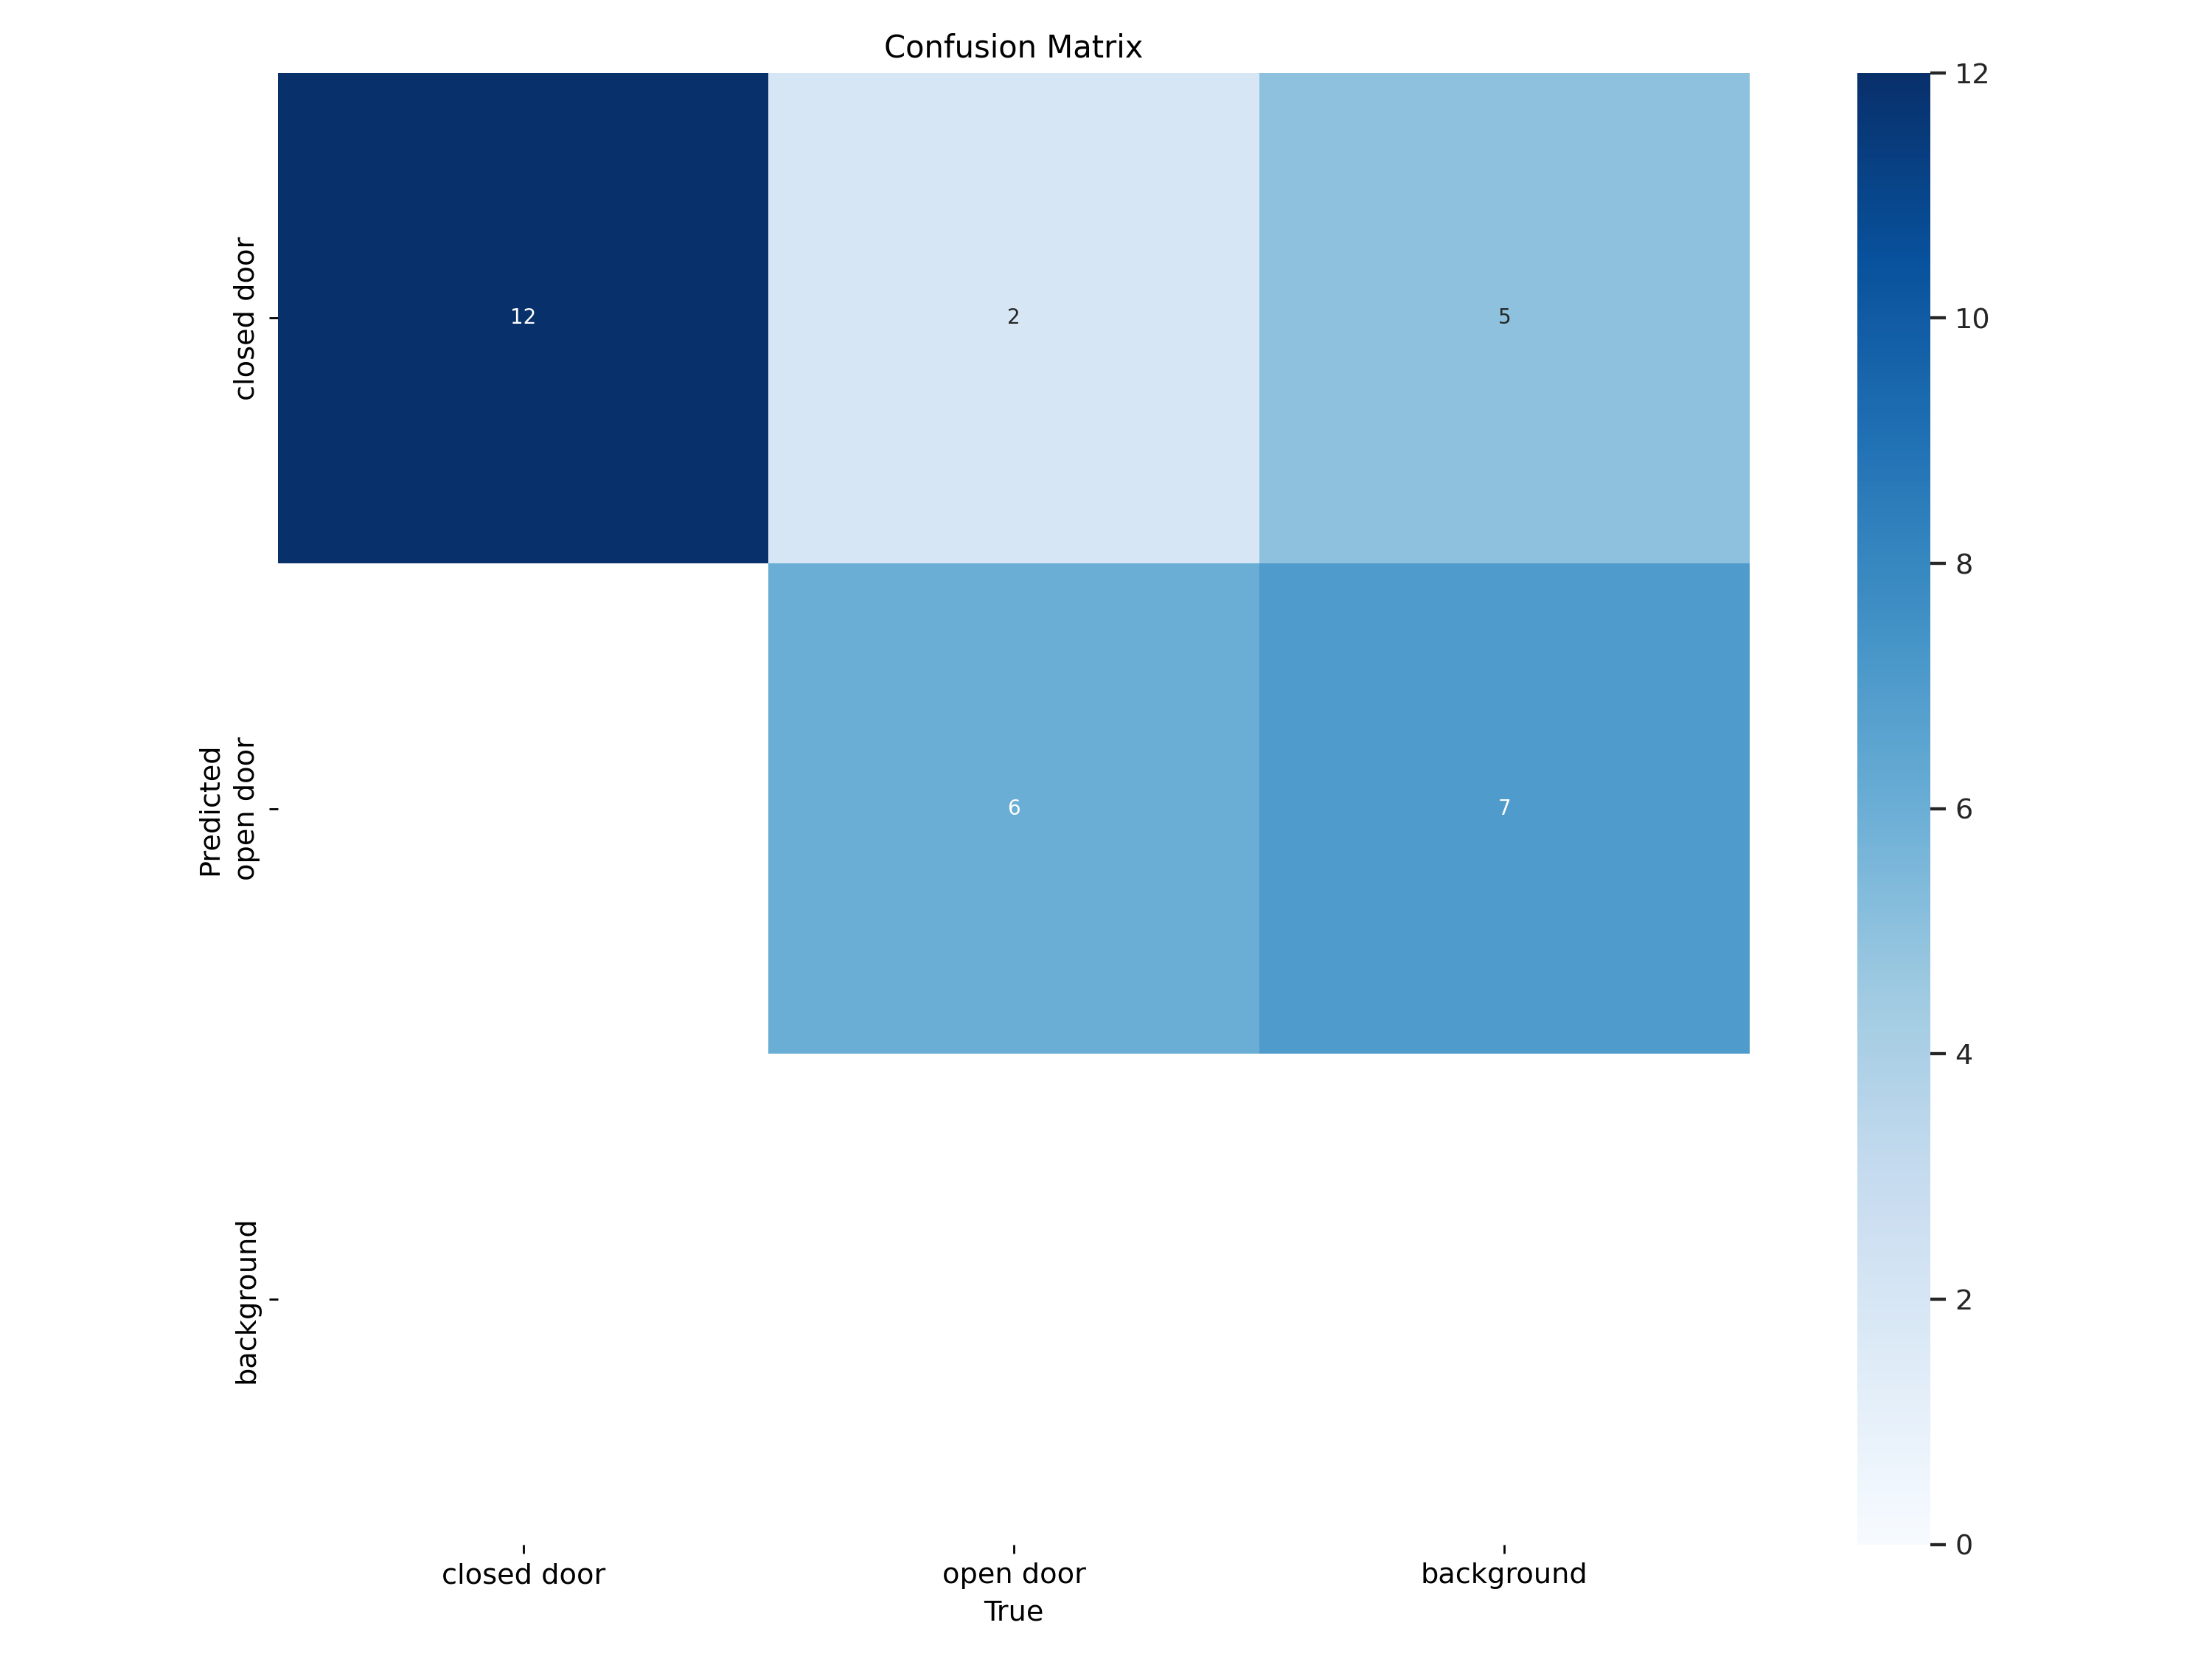

In [ ]:
Image(filename='confusion_matrix.png', width=600)

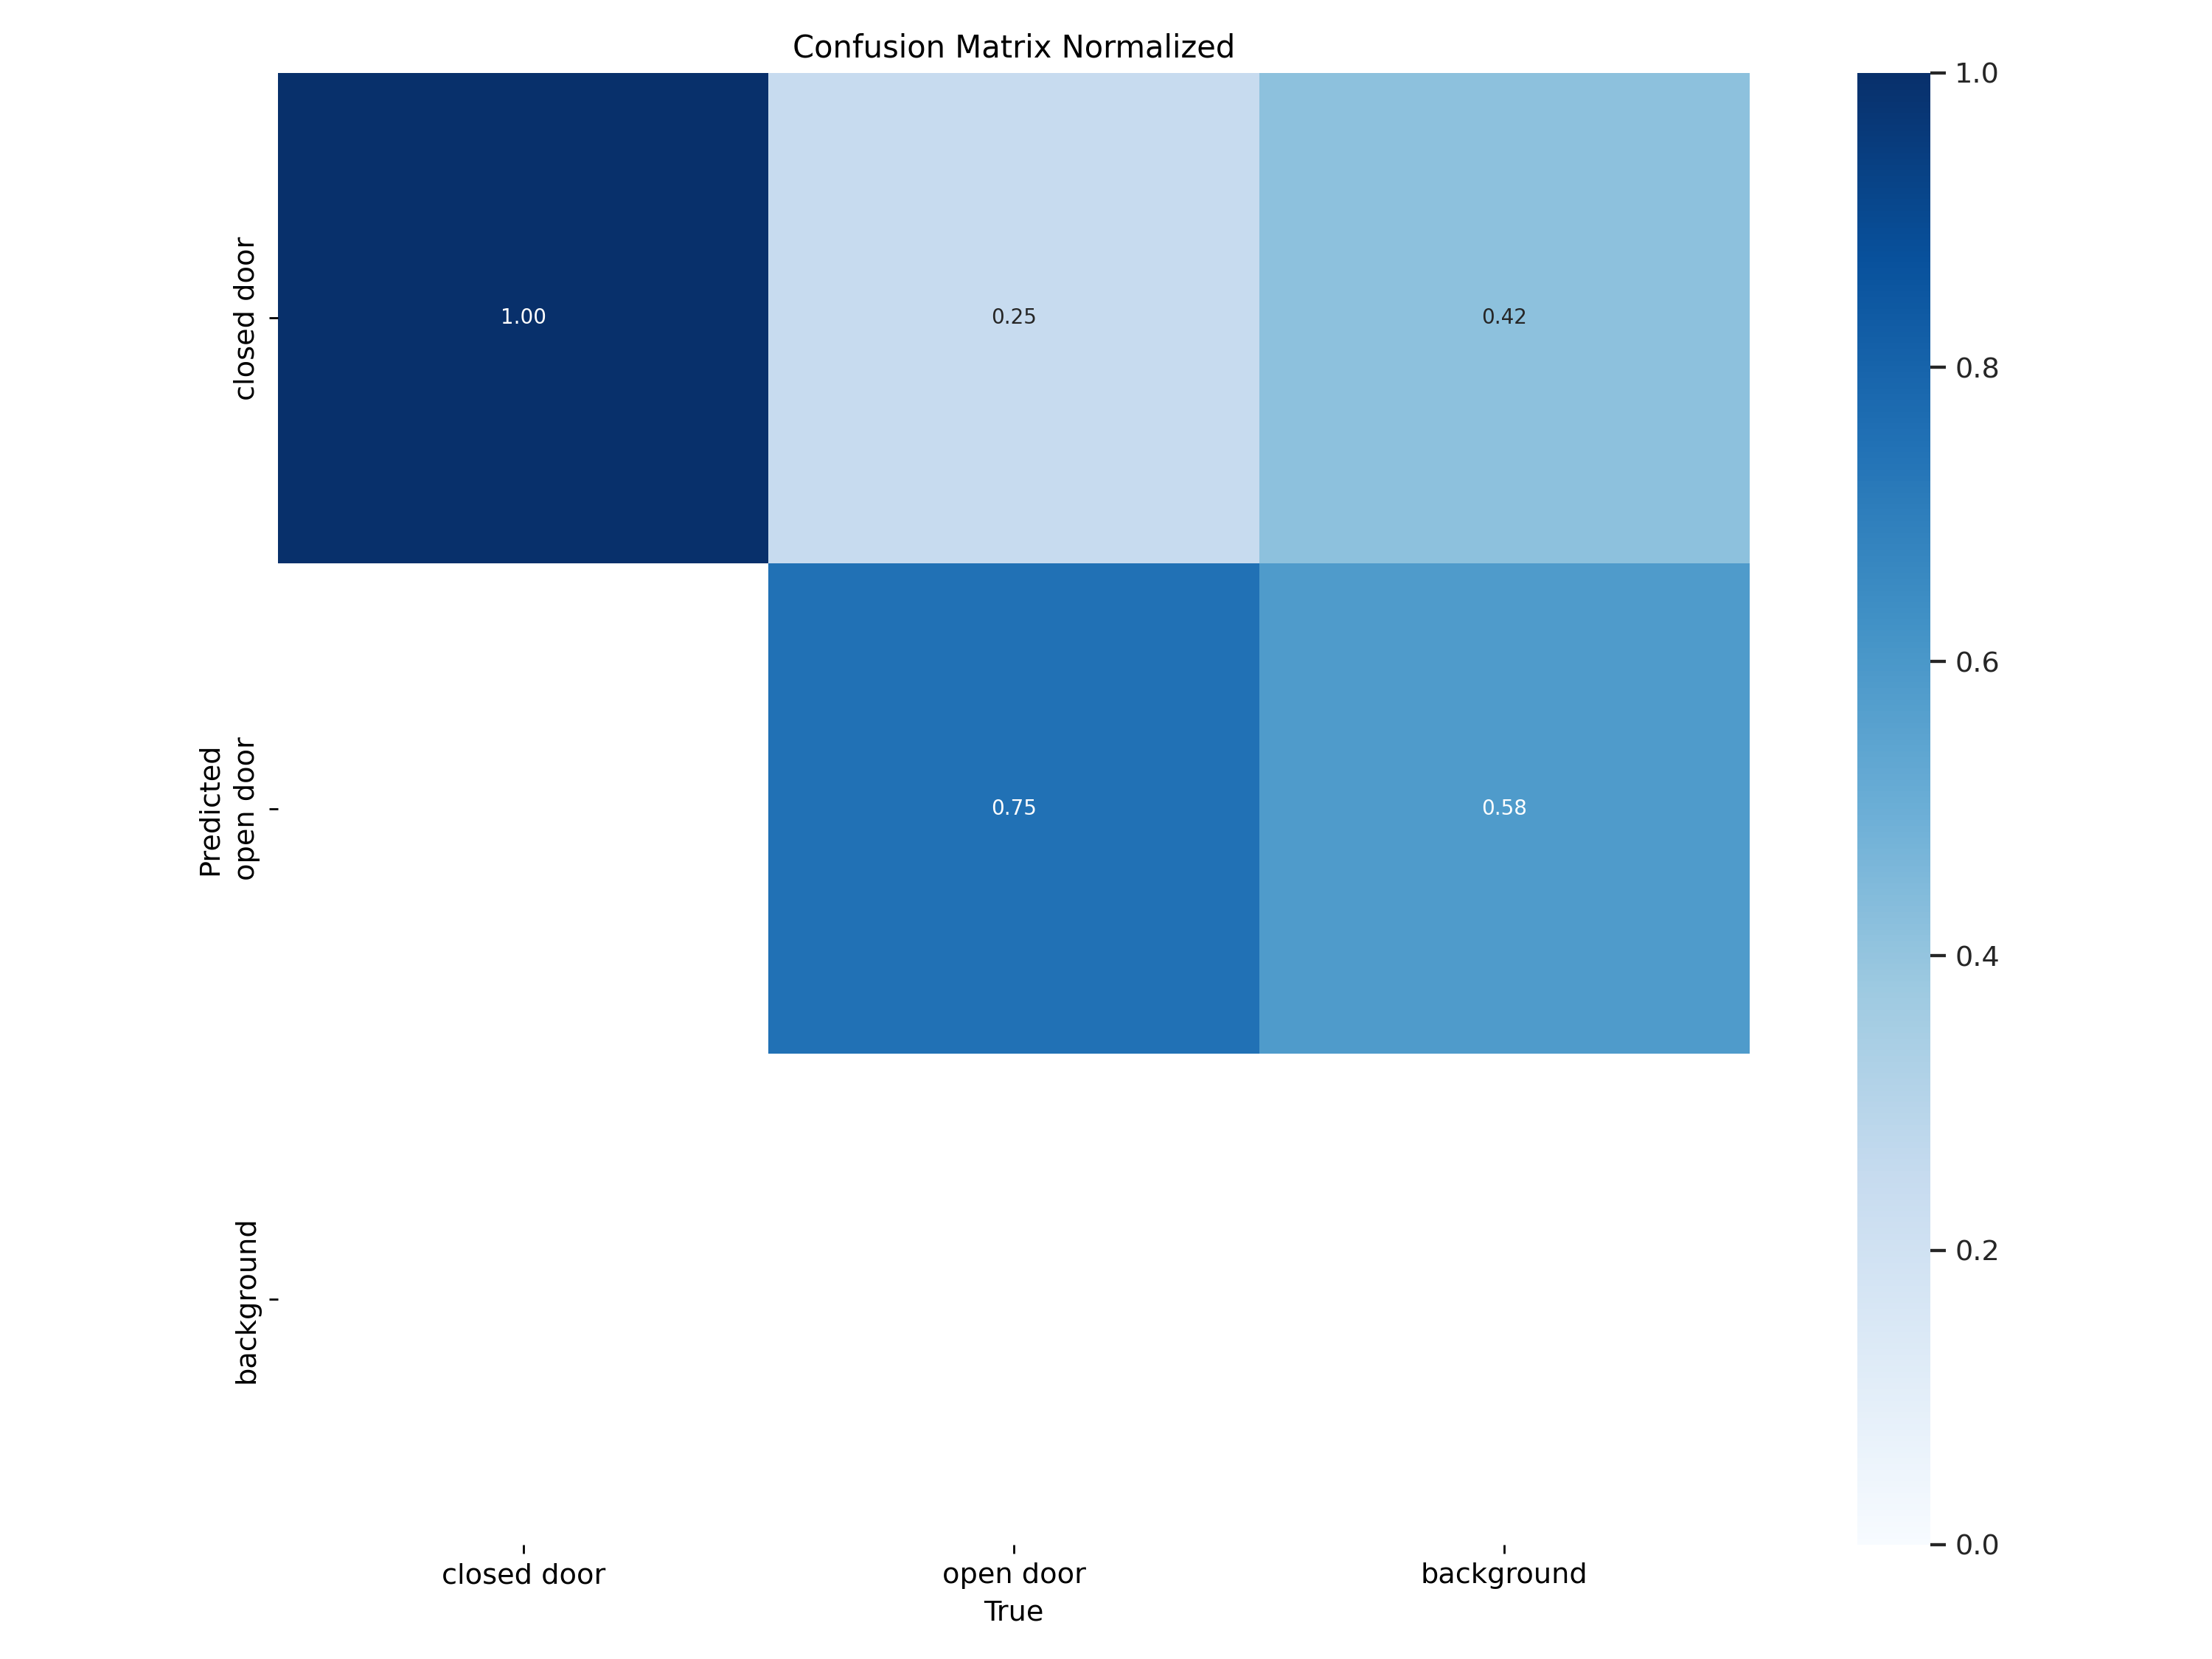

In [ ]:
Image(filename='confusion_matrix_normalized.png', width=600)

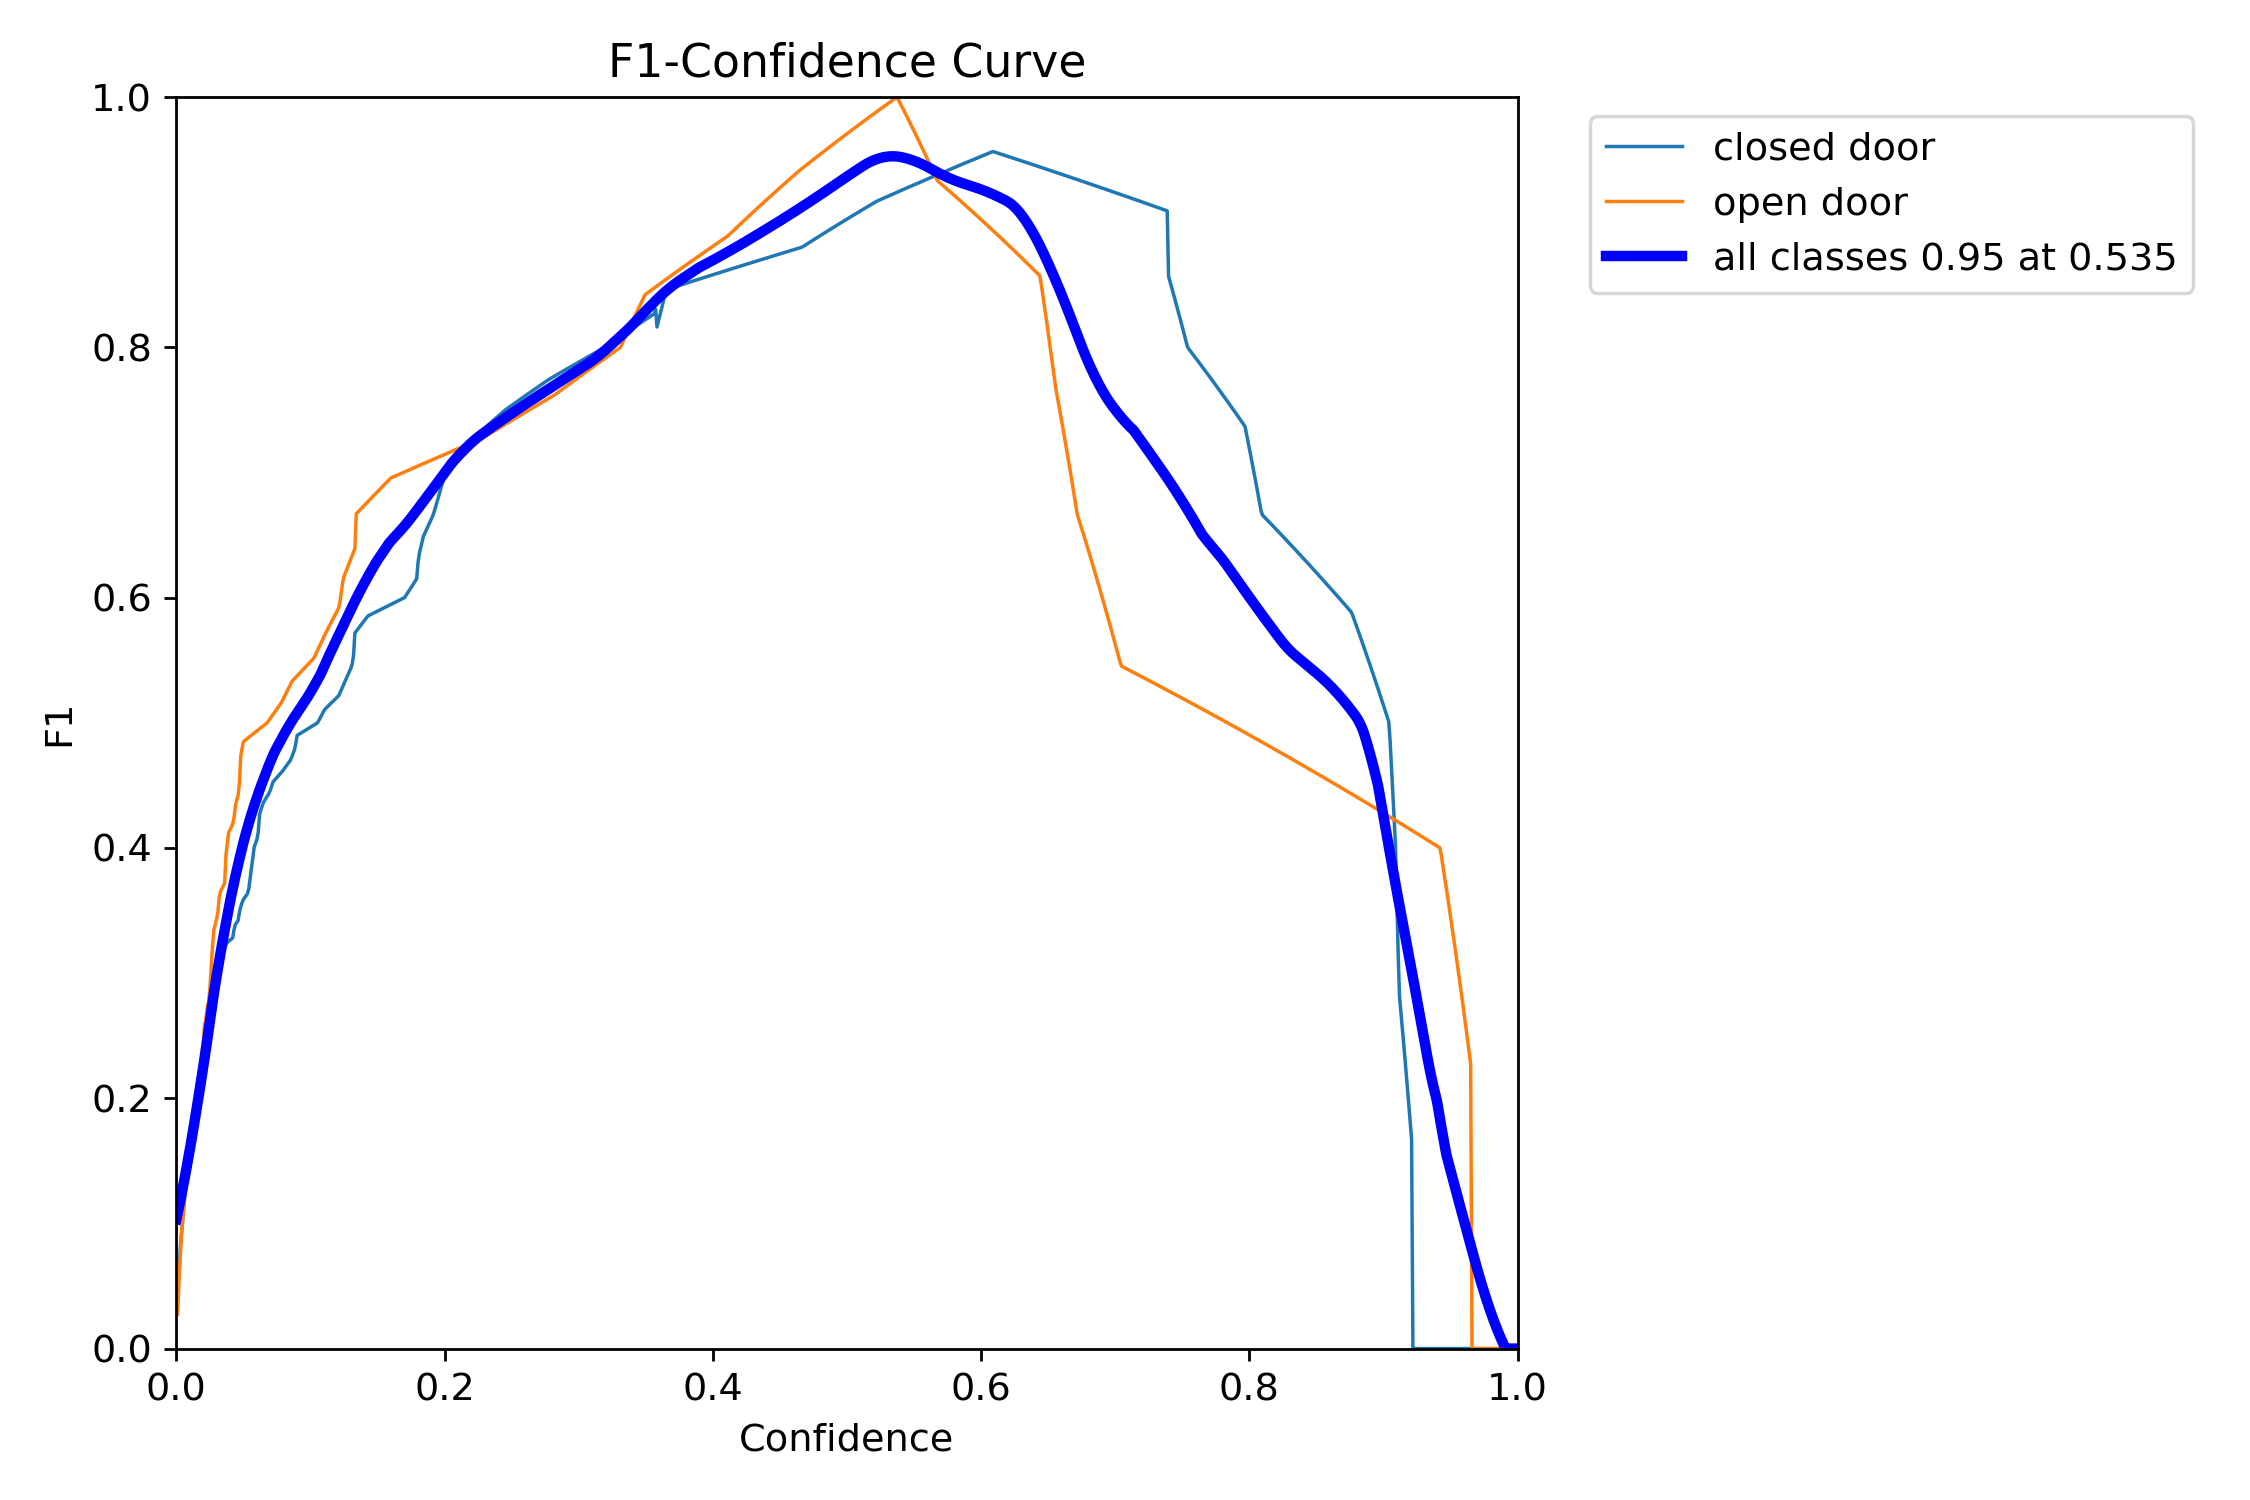

In [ ]:

Image(filename='F1_curve.png', width=600)

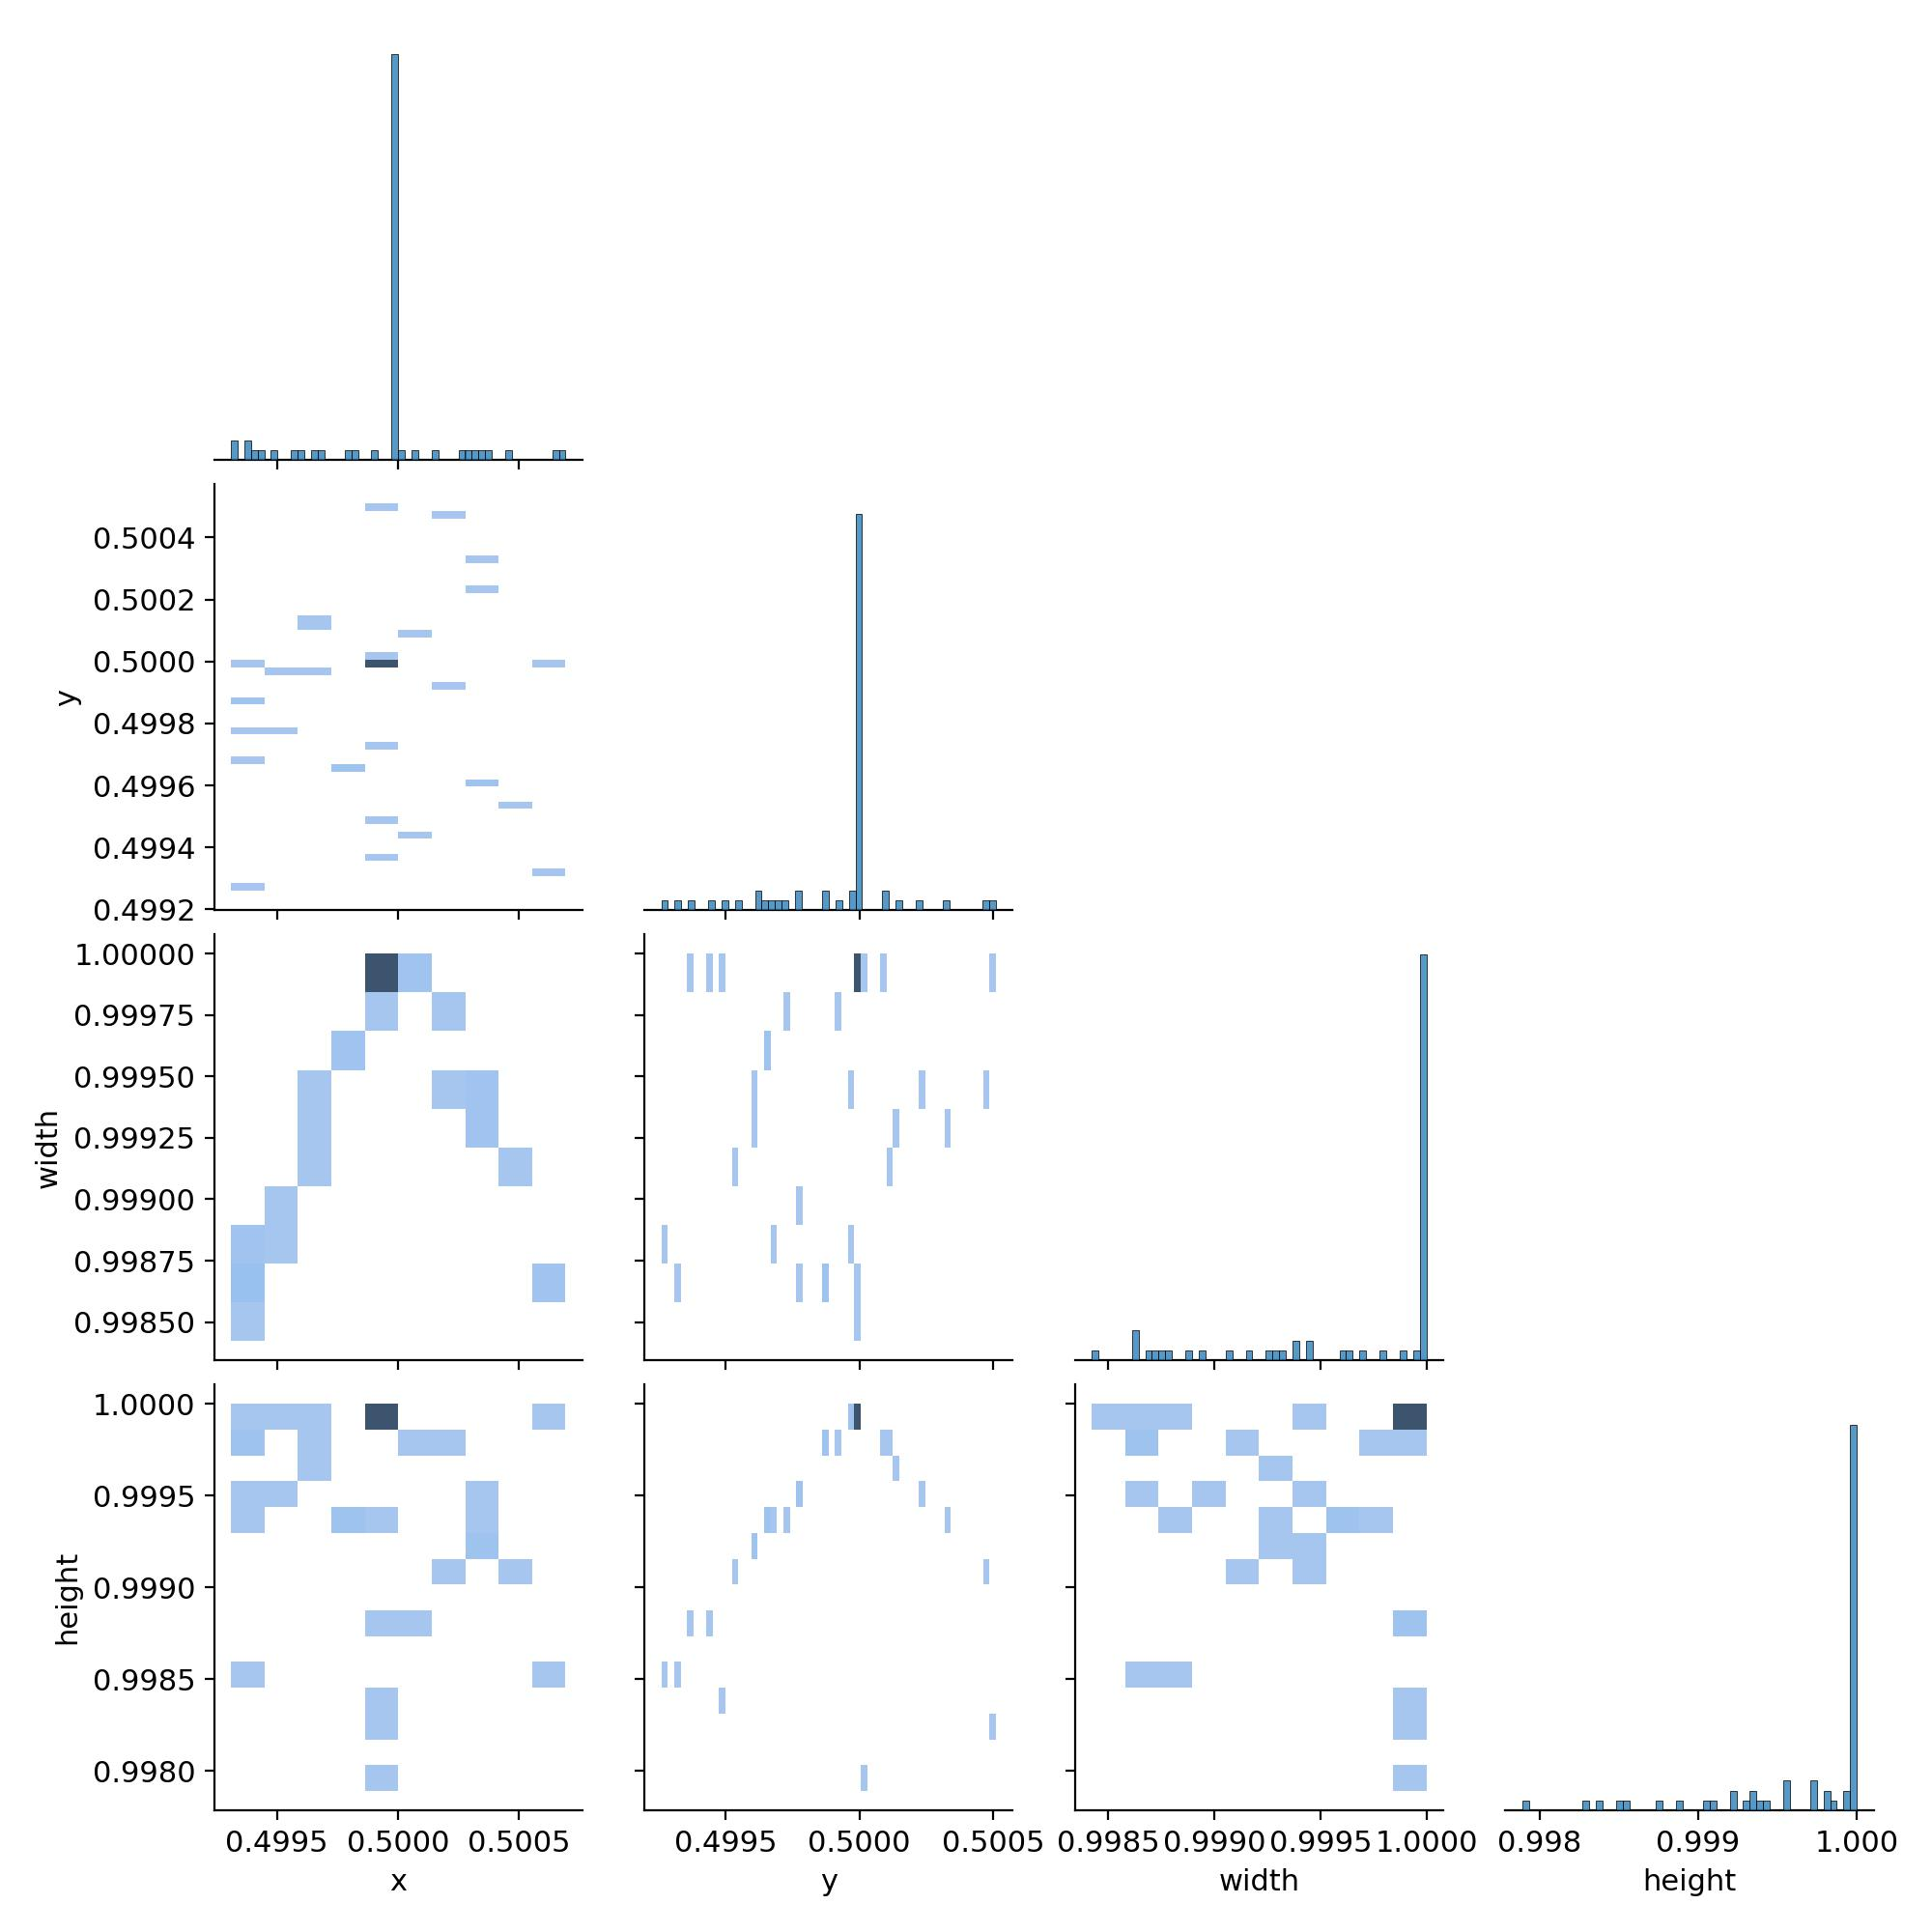

In [ ]:
Image(filename='labels_correlogram.jpg', width=600)

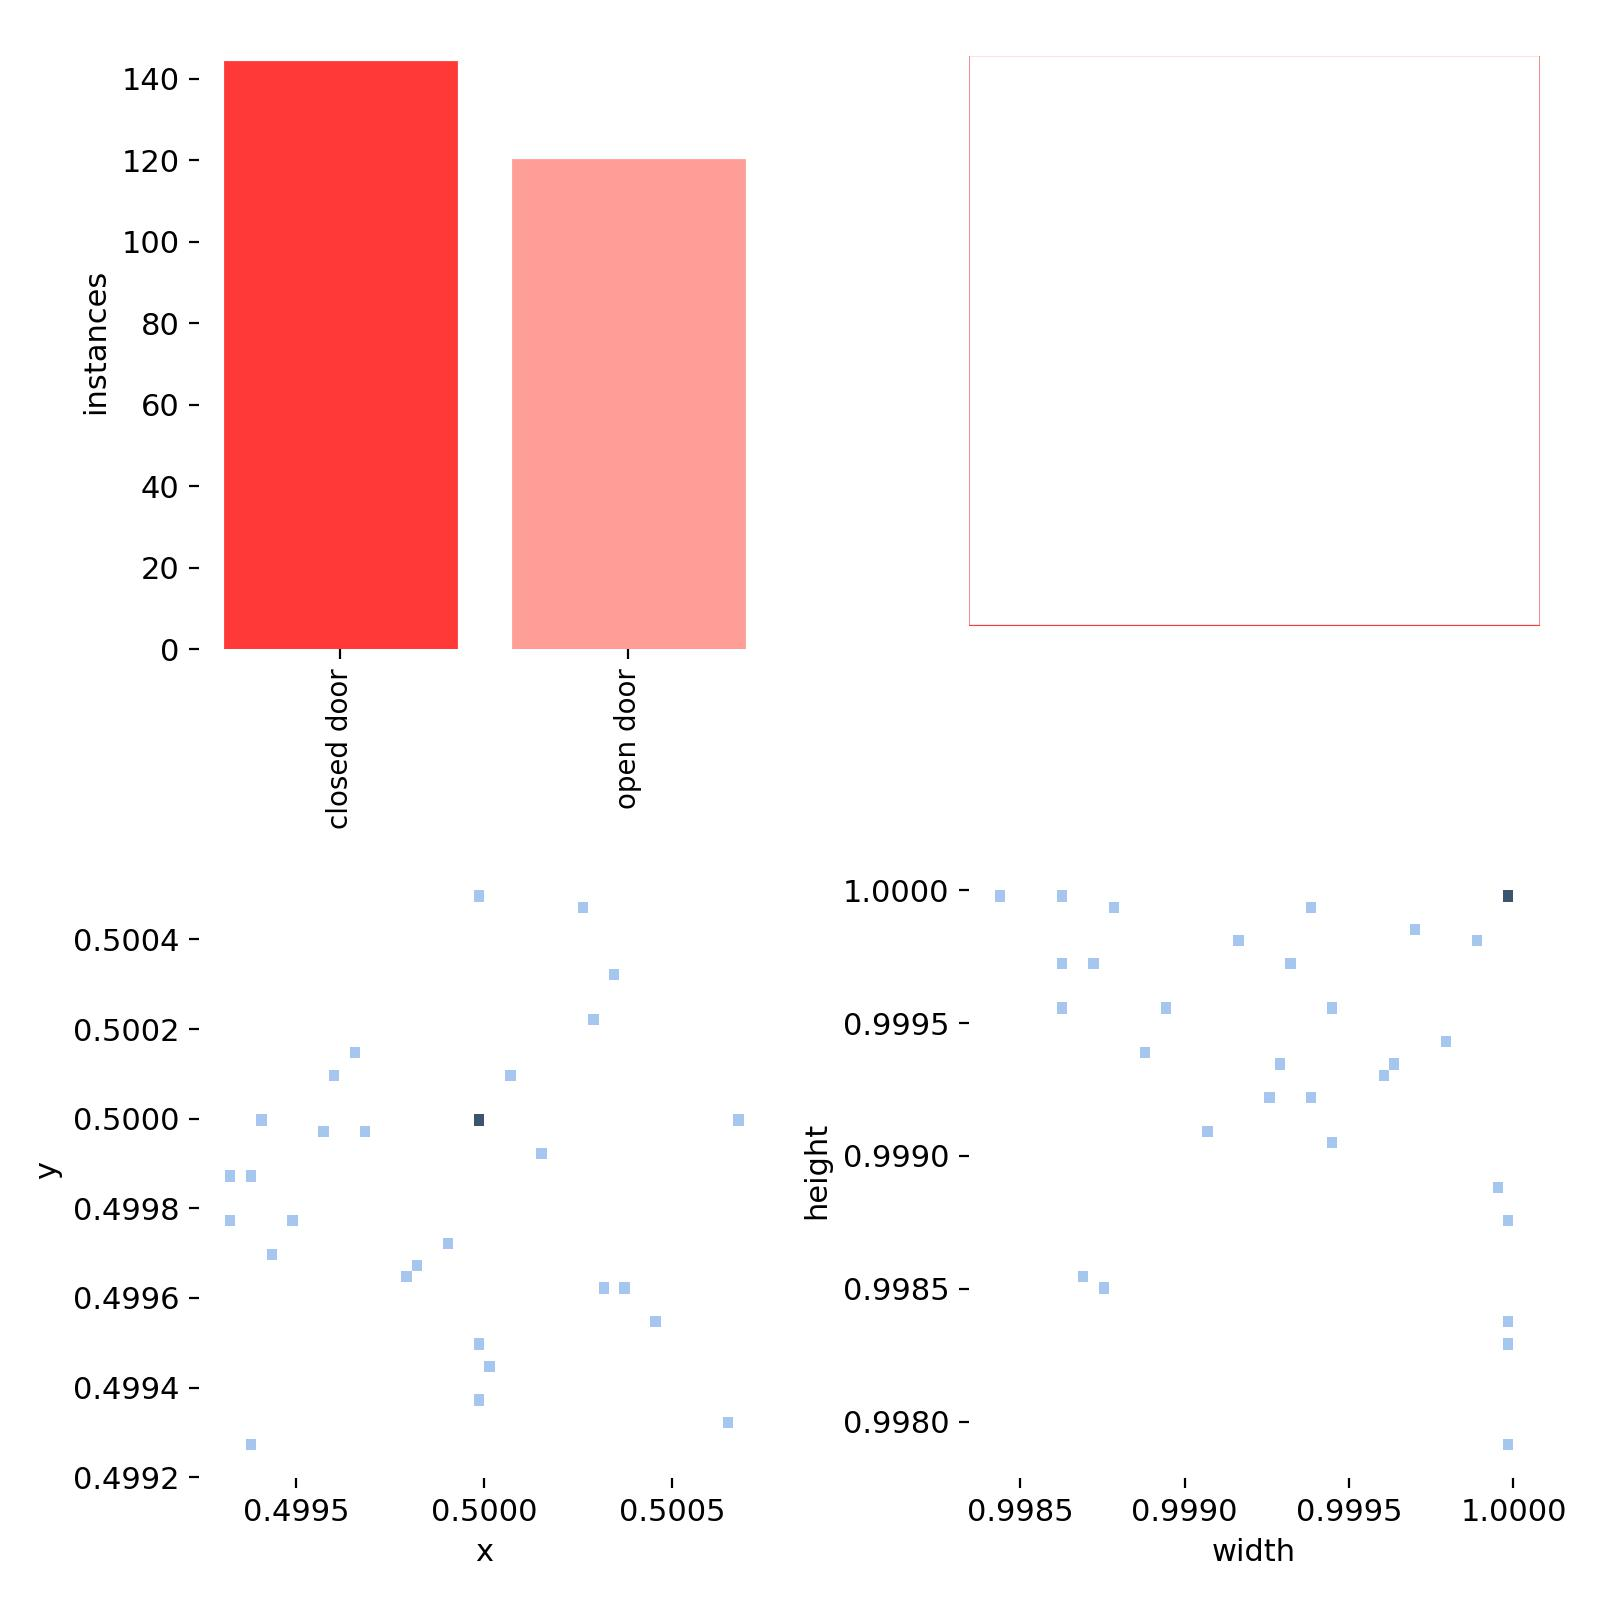

In [ ]:
Image(filename='labels.jpg', width=600)

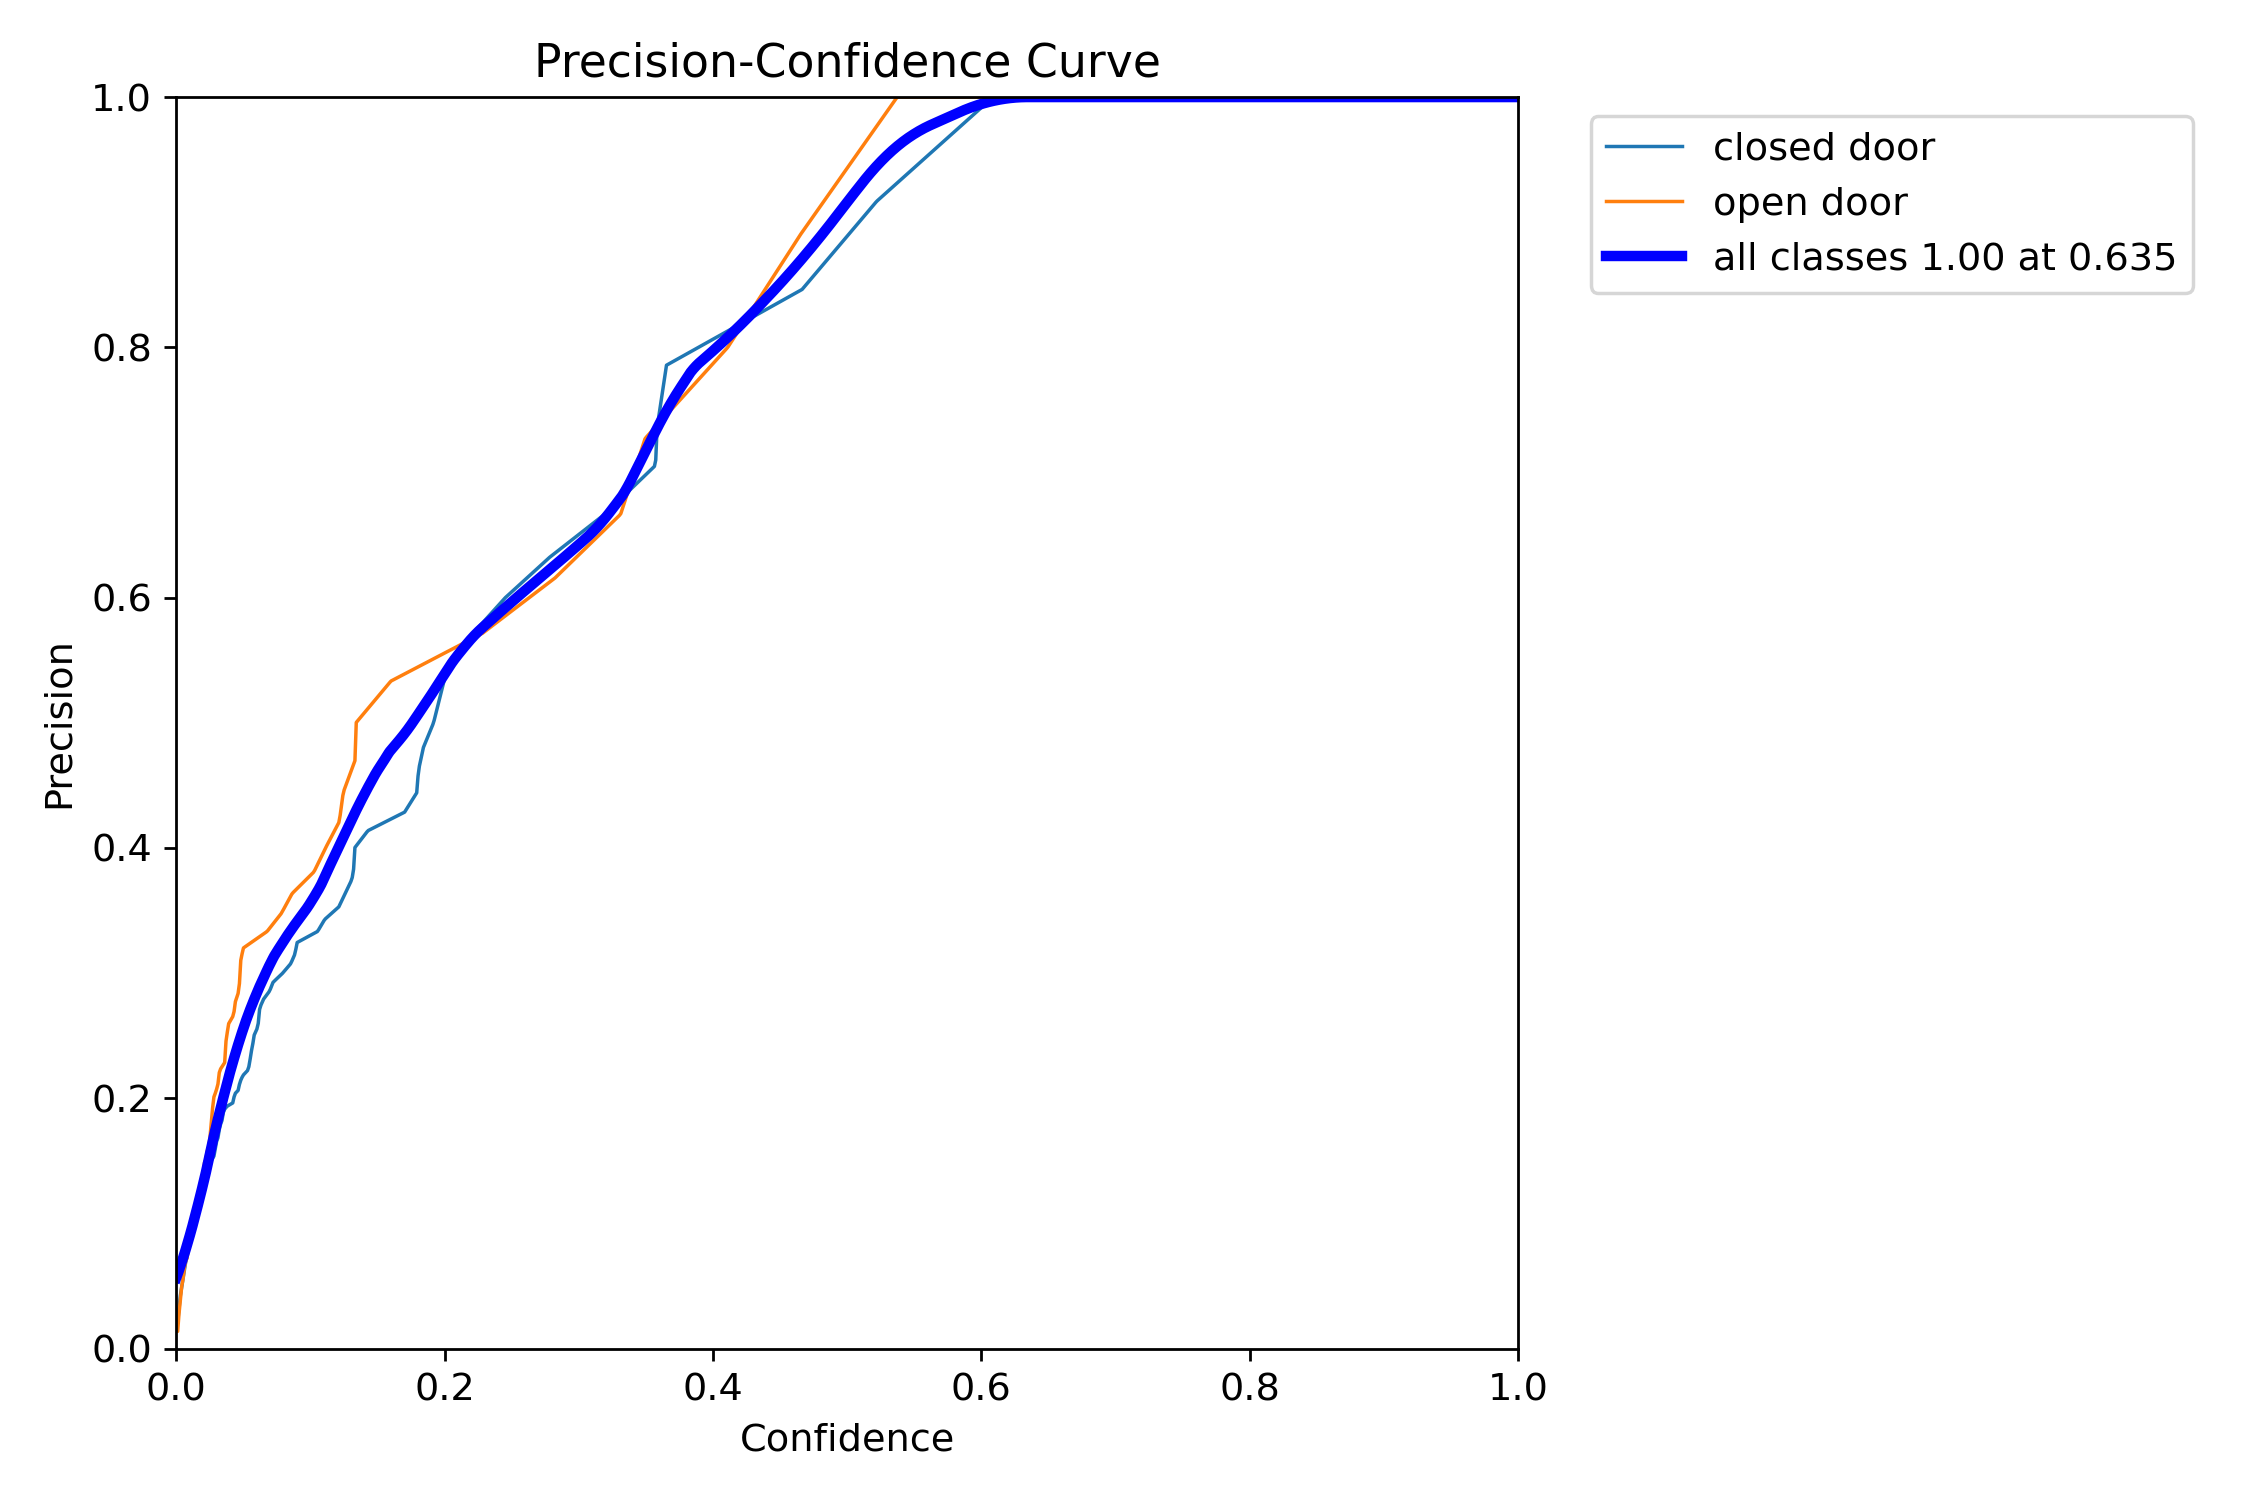

In [ ]:
Image(filename='P_curve.png', width=600)

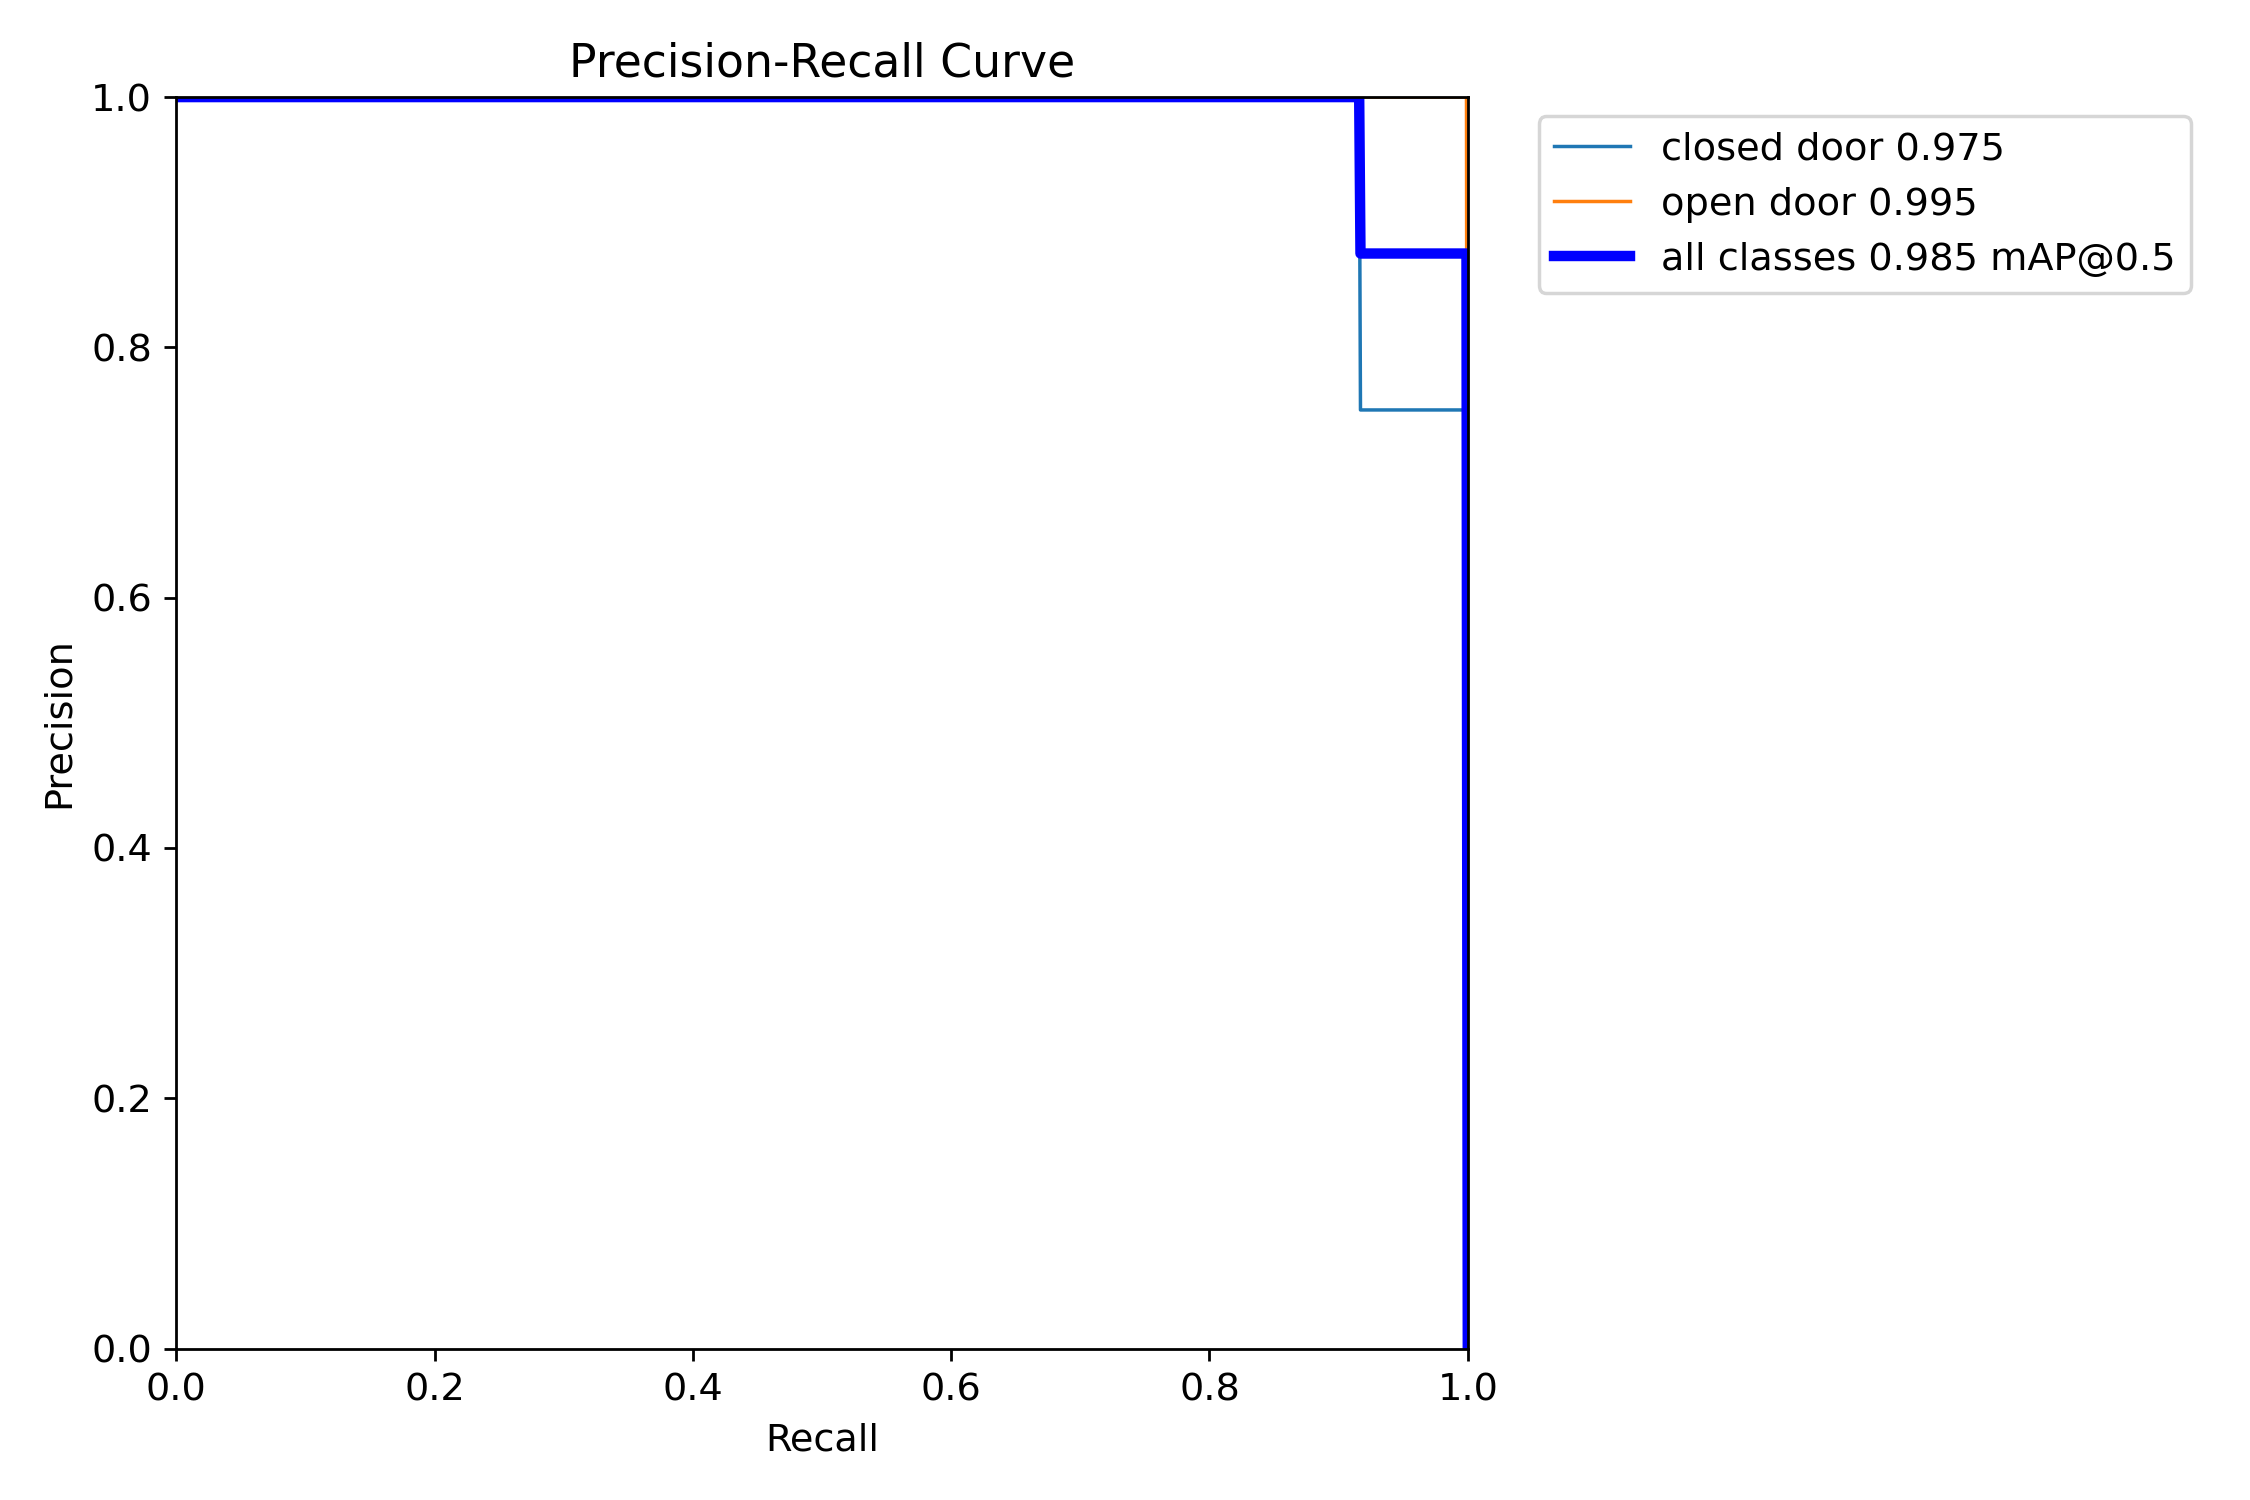

In [ ]:
Image(filename='PR_curve.png', width=600)

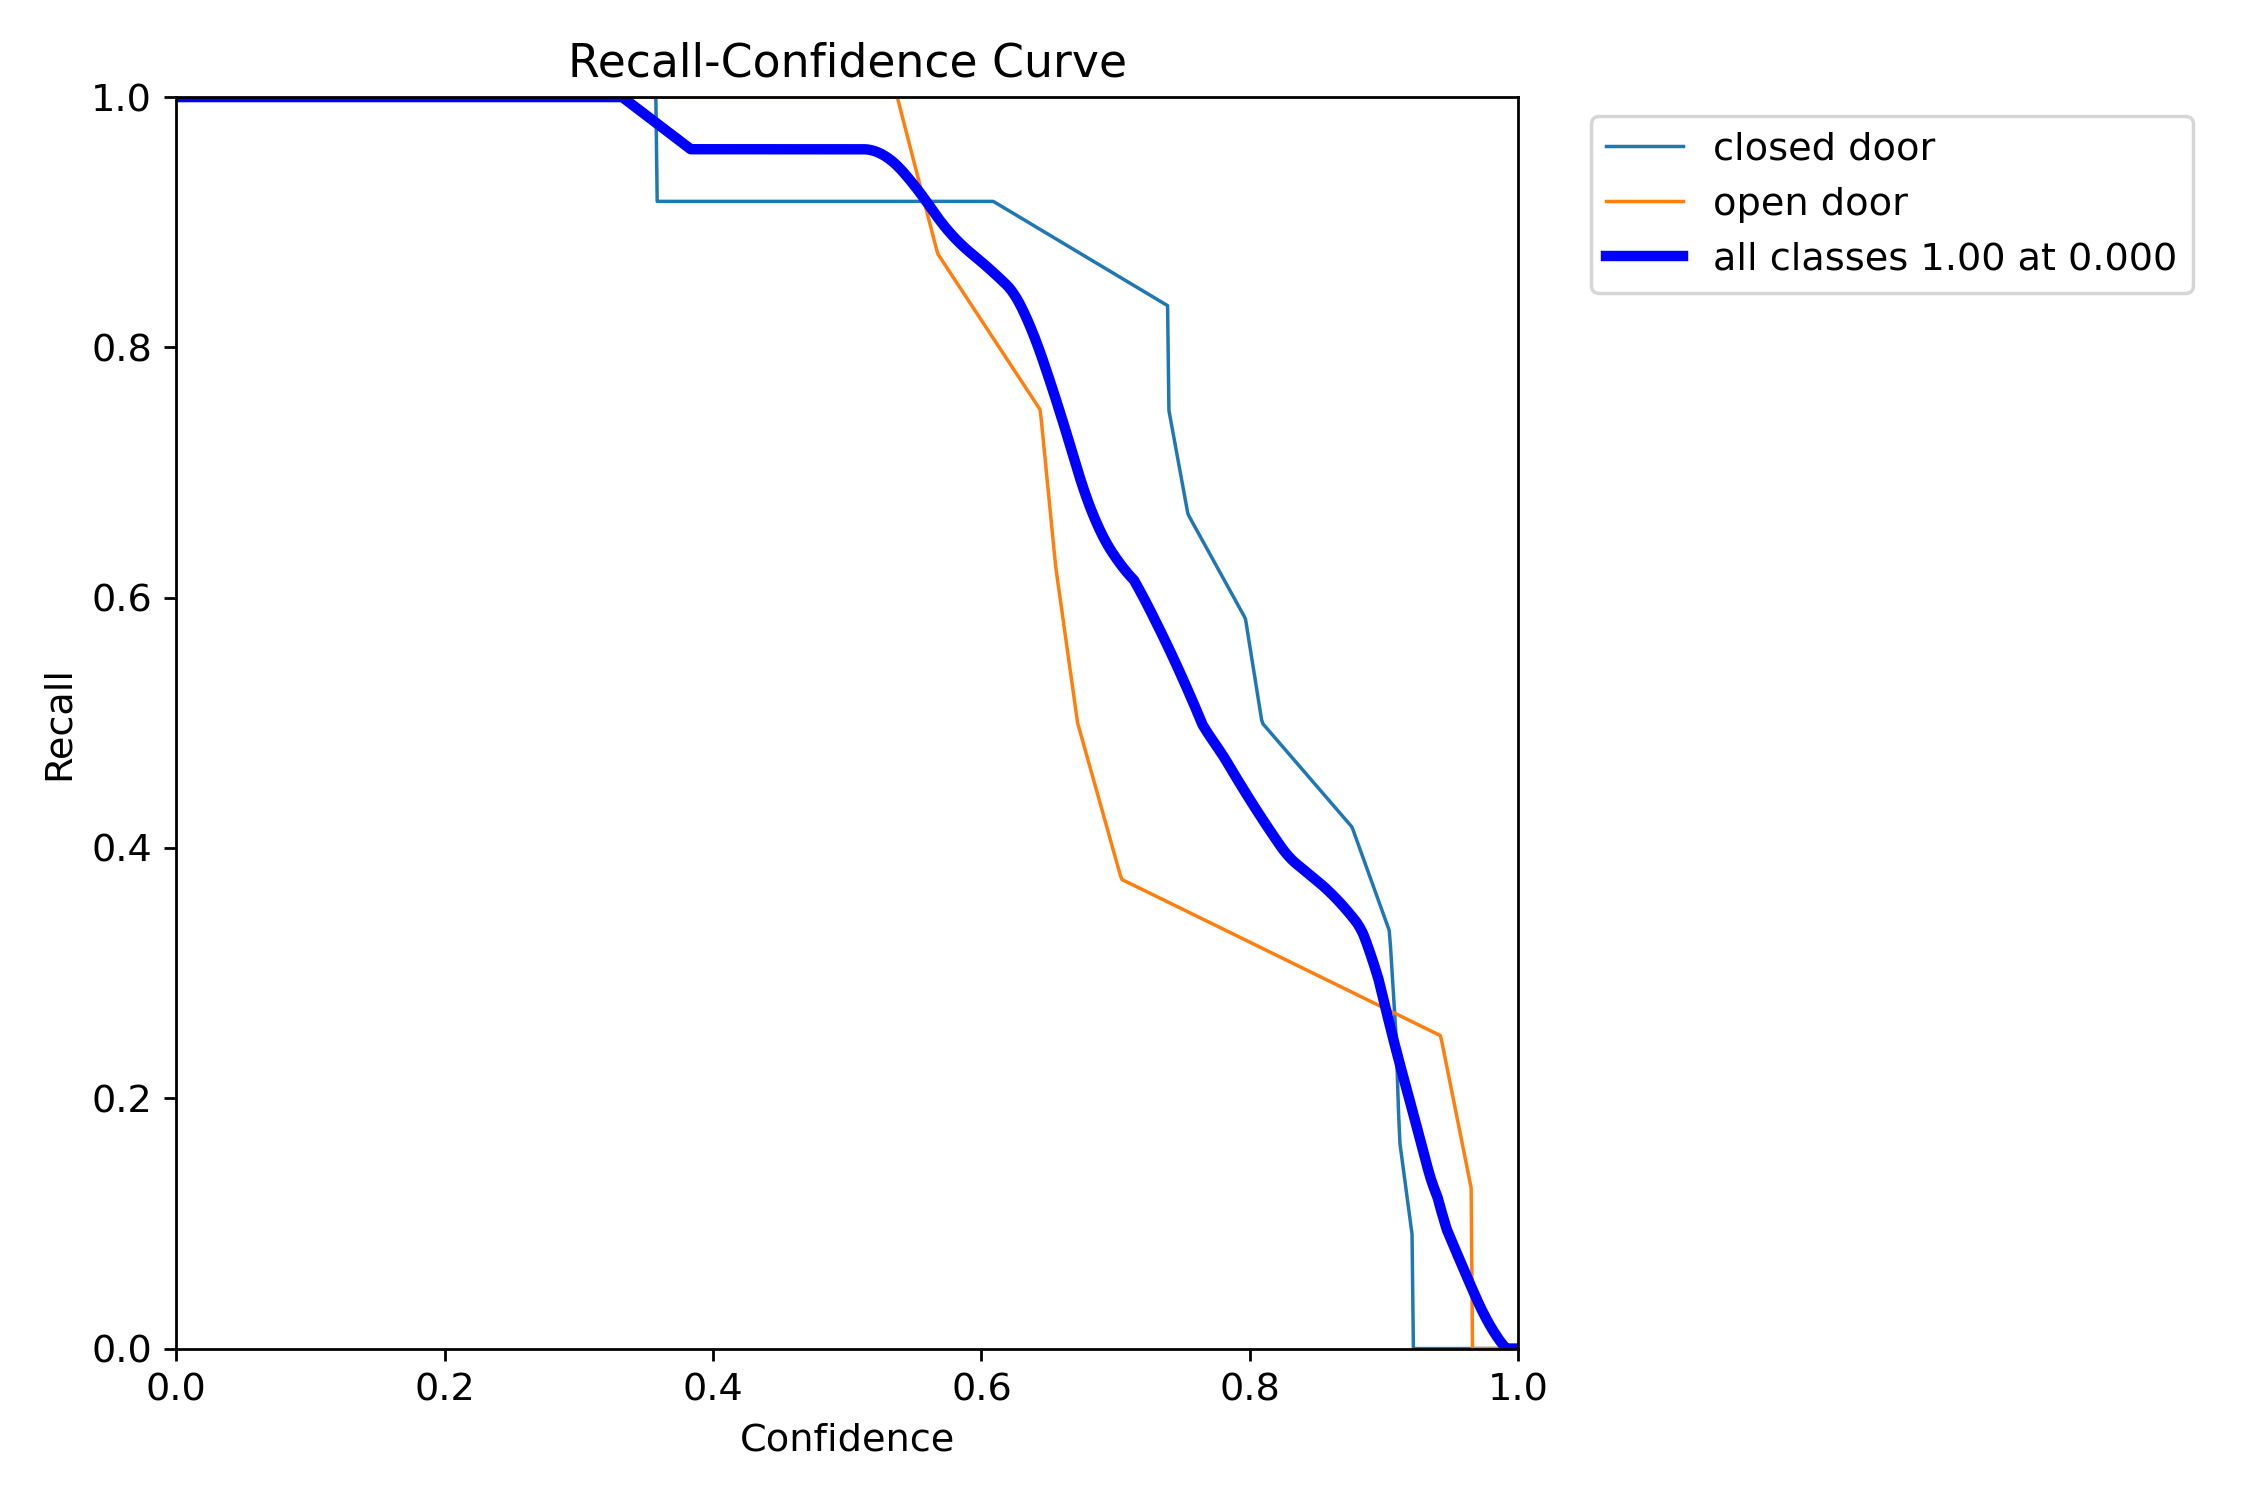

In [ ]:

Image(filename='R_curve.png', width=600)

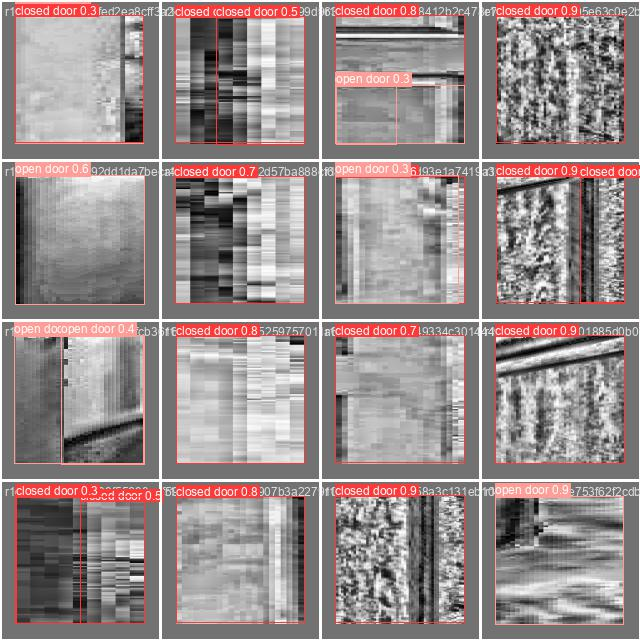

In [ ]:
Image(filename='val_batch0_pred.jpg', width=600)

In [ ]:
cd weights

/content/runs/detect/train4/weights


In [ ]:
model = YOLO("bestown.pt")

In [ ]:
predict = model.predict("/content/door-detection2-1/test/images/r3s5_jpg.rf.14c2a1130b78f4dc65e2b6c39b197b53.jpg", save = True, save_txt = True) 


image 1/1 /content/door-detection2-1/test/images/r3s5_jpg.rf.14c2a1130b78f4dc65e2b6c39b197b53.jpg: 128x128 2 open doors, 57.6ms
Speed: 14.0ms preprocess, 57.6ms inference, 39.2ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
